In [1]:
import cv2
import numpy as np

In [2]:
import os
import pickle
import matplotlib.pyplot as plt
from IPython.display import clear_output

### Detect Face:

In [3]:
def detect_face(frame):   
    detector = cv2.CascadeClassifier("frontal_face.xml")
    faces = detector.detectMultiScale(frame,1.2,5)
    return faces

### Converting Image to Gray Scale:

In [4]:
def gray_scale(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image

### Cut Face out of Captured Image

In [5]:
def cut_faces(image, faces_coord):
    faces = [] 
    for (x, y, w, h) in faces_coord:
        faces.append(image[y: y + h, x : x + w ]) #y is row..y+h number of rows,x is column x+w number of columns     
    return faces

### Normalize Image: Increasing Pixel Intensity(Brightness)

In [6]:
def normalize_intensity(images):
    images_norm = []
    for image in images:
        images_norm.append(cv2.equalizeHist(image))
    return images_norm

### Resize Image:
- cv.INTER_AREA for shrinking
- cv.INTER_CUBIC for zooming

In [7]:
def resize(images,size=(47,62)):
    image_resize = []
    for image in images:
        if image.shape < size:
            img_size = cv2.resize(image,size,interpolation=cv2.INTER_CUBIC)
        else:
            img_size = cv2.resize(image,size,interpolation=cv2.INTER_AREA)
        image_resize.append(img_size)    
    return image_resize

### Make Pipeline of all Image Editing Functions:

In [8]:
def normalize_faces(frame, faces_coord):
    faces = cut_faces(frame, faces_coord)
    faces = normalize_intensity(faces)
    faces = resize(faces)
    return faces

### Plotting Image as 2D:

In [9]:
def plot_show(image,title=""):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.axis("off")
    plt.title(title)
    plt.imshow(image,cmap="Greys_r")
    plt.show()

### Border of Frame for Face Detection:

In [10]:
def draw_rectangle(image, coords):
    for (x, y, w, h) in coords:
        cv2.rectangle(image, (x , y), (x + w , y + h), (0,0,255),2)

### Create Dataset:
### Opening Cam and Capturing Image:

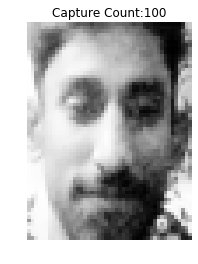

In [12]:
count = int(input('Enter No. of Persons: '))

for i in range(1, count+1):
    cam = cv2.VideoCapture(0)
    #cv2.namedWindow("Face", cv2.WINDOW_AUTOSIZE)
    folder = "E:\MYPRO/"+input(f'Person {i}:').lower()
    
    if not os.path.exists(folder):
        os.mkdir(folder)
        flag_start_capturing = False
        sample=1
        cv2.namedWindow("Face", cv2.WINDOW_NORMAL)

        while True:
            ret,frame = cam.read()
            gray = gray_scale(frame)
            faces_coord = detect_face(gray)

            if len(faces_coord):
                faces = normalize_faces(gray,faces_coord)
                cv2.imwrite(folder + '/' + str(sample)+'.jpg',faces[0])
                plot_show(faces[0],"Capture Count:"+str(sample))
                clear_output(wait=True)
                if flag_start_capturing == True:
                    sample += 1
            
            draw_rectangle(frame,faces_coord)
            cv2.imshow('Face',frame)
            keypress=cv2.waitKey(1)
        
            #if keypress == ord('c'):
            if flag_start_capturing == False:
                    flag_start_capturing = True
        
            if sample >100: # Capture Count
                break
            
            if keypress == ord('q'): # Quit
                break

        cam.release()
        cv2.destroyAllWindows()
    else:
        print ("This name already exists.")

In [28]:
cam.release()

NameError: name 'person' is not defined

### Collect Dataset:

In [41]:
def collect_dataset():
    images = []
    labels = []
    labels_dic = {}
   
    people = [person for person in os.listdir("E:\MYPRO/")]
   
    for i, person in enumerate(people):
        labels_dic[i] = person
        for image in os.listdir("E:\MYPRO/" + person):
            if image.endswith('.jpg'):
                images.append(cv2.imread("E:\MYPRO/" + person + '/' + image, 0))
                labels.append(i)
    return (images, np.array(labels), labels_dic)

In [42]:
images, labels, labels_dic = collect_dataset()

In [43]:
print (len(images))
print (labels_dic)

267
{0: 'asd', 1: 'dsa', 2: 'peaks'}


In [44]:
images[0].shape

(62, 47)

In [45]:
train = np.asarray(images)

In [46]:
print(type(train))
train.shape

<class 'numpy.ndarray'>


(267, 62, 47)

In [47]:
x_train = train.reshape(len(train),-1)

In [48]:
x_train.shape

(267, 2914)

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train.astype(np.float64))

In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components=.97)
x_train_pca = pca.fit_transform(x_train_sc)

In [51]:
pca.n_components_

98

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [53]:
param = {'C':[.001,.01,.1,1,10],'penalty':['l2','l1']}
gd_log = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid = param, cv=5, scoring='accuracy')
gd_log.fit(x_train_pca,labels)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\ProgramData\Anaconda3\lib\site-pa

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\ProgramData\Anaconda3\lib\site-pa

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l2', 'l1']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [54]:
print(gd_log.best_score_)
gd_log.best_params_

0.9962546816479401


{'C': 0.01, 'penalty': 'l2'}

In [55]:
clf_log = gd_log.best_estimator_

In [56]:
filename = 'Face_Detection_log.pkl'
f = open(filename, 'wb')
pickle.dump(clf_log, f)
f.close()

In [57]:
filename = 'Face_Detection_log.pkl'
clf_log_load = pickle.load(open(filename, 'rb'))

In [58]:
clf_log_load

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [59]:
cam = cv2.VideoCapture(0)
font = cv2.FONT_HERSHEY_PLAIN
cv2.namedWindow("opencv_face", cv2.WINDOW_AUTOSIZE)

while True:
    ret,frame = cam.read()
    
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces_coord = detect_face(gray) # detect more than one face
    if len(faces_coord):
        faces = normalize_faces(gray, faces_coord)
        faces = normalize_intensity(faces)
        for i, face in enumerate(faces): # for each detected face
            x_test = face.reshape(1,-1)
            x_test_sc = sc.transform(x_test.astype(np.float64))
            x_test_pca = pca.transform(x_test_sc)    
            
            prob = gd_log.predict_proba(x_test_pca)
            confidence = gd_log.decision_function(x_test_pca)
            print (confidence)
            print (prob)
           
            y_pred = gd_log.predict(x_test_pca)
            print (y_pred, y_pred[0])
           
            name = labels_dic[y_pred[0]].capitalize()
            print(name)
            
            if prob[0][0]>.7:
                cv2.putText(frame, 'adarsh', (faces_coord[i][0], faces_coord[i][1] - 10),cv2.FONT_HERSHEY_PLAIN, 2, (66, 53, 243), 2)
                
            elif prob[0][1]>.85:
                cv2.putText(frame, 'aditya', (faces_coord[i][0], faces_coord[i][1] - 10),
                            cv2.FONT_HERSHEY_PLAIN, 3, (66, 53, 243), 2)
                  
        clear_output(wait = True)
        draw_rectangle(frame, faces_coord) # rectangle around face
        
    cv2.putText(frame, "q to exit", (5, frame.shape[0] - 5),cv2.FONT_HERSHEY_PLAIN, 1.3, (66, 53, 243), 2,cv2.LINE_AA)
    
    cv2.imshow("opencv_face", frame) # live feed in external
    if cv2.waitKey(5) == ord('q'):
        break
        
cam.release()
cv2.destroyAllWindows()
  

[[-6.41946819 -4.35642614 10.04992726]]
[[0.00160402 0.01248392 0.98591206]]
[2] 2
Peaks
